# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-mhx6UJW0-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 72192.63 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 99536.76 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 115999.01 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 142717.79 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 148194.75 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 73398.57 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 107065.38 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 125008.23 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 135822.46 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 143504.10 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 148604.66 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.04 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.13 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.80 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.07 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.04 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.78 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.62 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.16 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.59 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.33 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.45 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.94 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.78 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.04 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.48 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.66 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.92 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.39 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.80 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.41 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.20 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 35.89 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 41.46 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 45.02 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 47.35 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 46.81 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.71 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.04 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.10 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.42 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 36.28 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.77 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.50 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 35.89 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 40.33 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 43.68 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 43.13 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 42.69 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.33 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.52 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.07 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.48 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.81 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.81 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.87 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.06 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.74 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.84 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.17 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.10 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.73 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.44 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.47 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.26 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 46.55 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 48.56 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 48.87 examples/s]

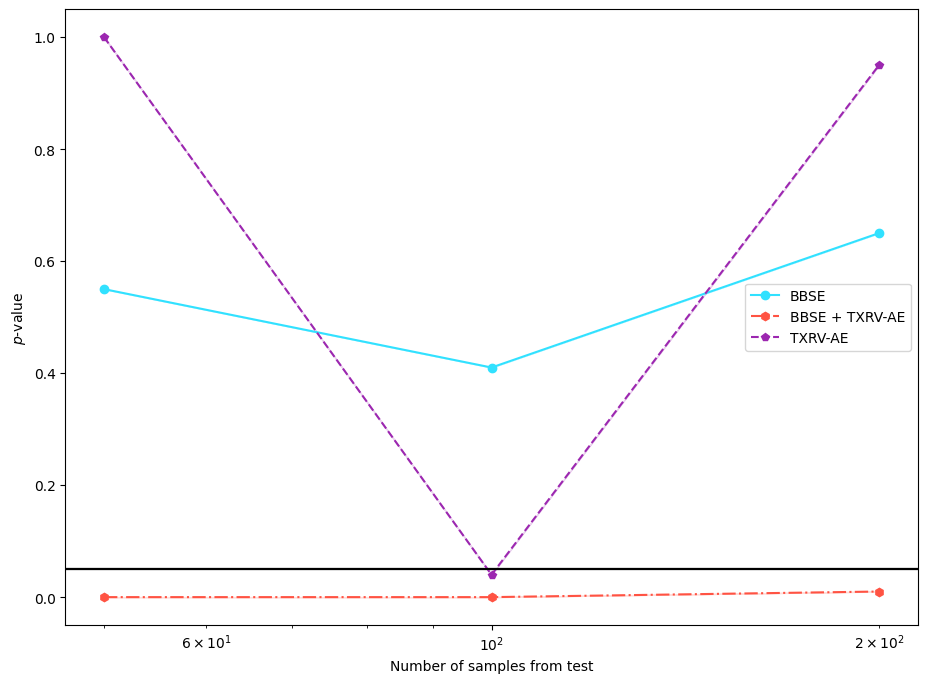

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.62 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 33.13 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.68 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.58 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.52 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.59 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 57.18 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.71 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.69 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.23 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.74 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 37.63 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.86 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.76 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.69 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.68 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.59 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.58 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.25 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.85 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 33.94 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 43.32 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.52 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.65 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.88 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.36 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.84 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.97 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.90 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.40 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.98 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.81 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.35 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.06 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.86 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.67 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.23 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.94 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.75 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 33.18 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.28 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.92 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.43 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.43 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.19 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.83 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 27.03 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 19.06 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 32.05 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.28 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.82 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.77 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.48 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.51 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.95 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.74 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.25 examples/s]

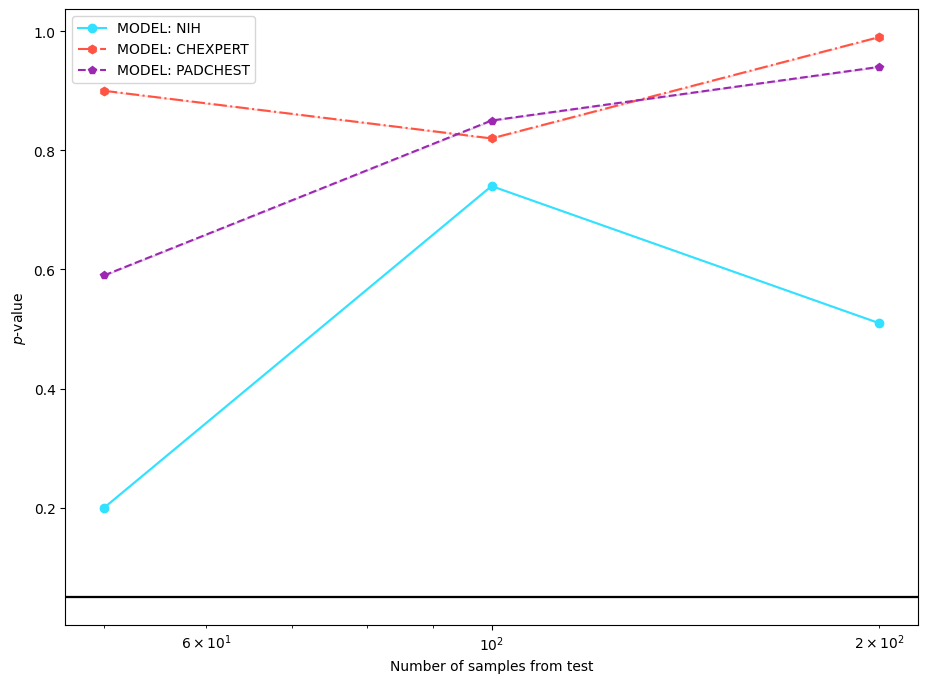

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54137.12 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 76156.52 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 89522.27 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 95526.68 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 98432.95 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 101632.62 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50793.54 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 73215.89 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 85324.75 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 92577.21 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 97111.40 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 101146.13 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.21 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 33.02 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.77 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.74 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.58 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.58 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.98 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.87 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.88 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 19.05 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 32.22 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.98 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.58 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.20 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.72 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.56 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.22 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.87 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.62 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53574.32 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 75230.11 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 83849.72 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 94869.48 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 98192.36 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 100596.21 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:02, 45153.31 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 65332.43 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 77294.11 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 85829.63 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 91657.66 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 96506.09 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.44 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.88 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.91 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.95 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 55.01 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.31 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.90 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.03 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.95 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.41 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.36 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.17 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.69 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.78 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.32 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.47 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.09 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.10 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.69 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51487.70 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 67363.57 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 78451.19 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 88195.84 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 100043.58 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 107822.02 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 49601.60 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71384.27 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 83686.73 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 91478.53 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 96481.37 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 100099.11 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.68 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 33.40 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.99 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.73 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.86 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.76 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.30 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.84 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.98 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.85 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.89 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.56 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.67 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.48 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.96 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.28 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.97 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.08 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.60 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 55226.90 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 76350.86 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 87502.97 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 93857.13 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 97506.21 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 101105.03 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51441.78 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 73586.74 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 85119.24 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 92431.32 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 96338.19 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 99796.73 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.47 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.66 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.05 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.28 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.02 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.28 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.48 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.31 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.08 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.12 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.16 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.24 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.18 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.57 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.49 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.67 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.98 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.99 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.77 examples/s]

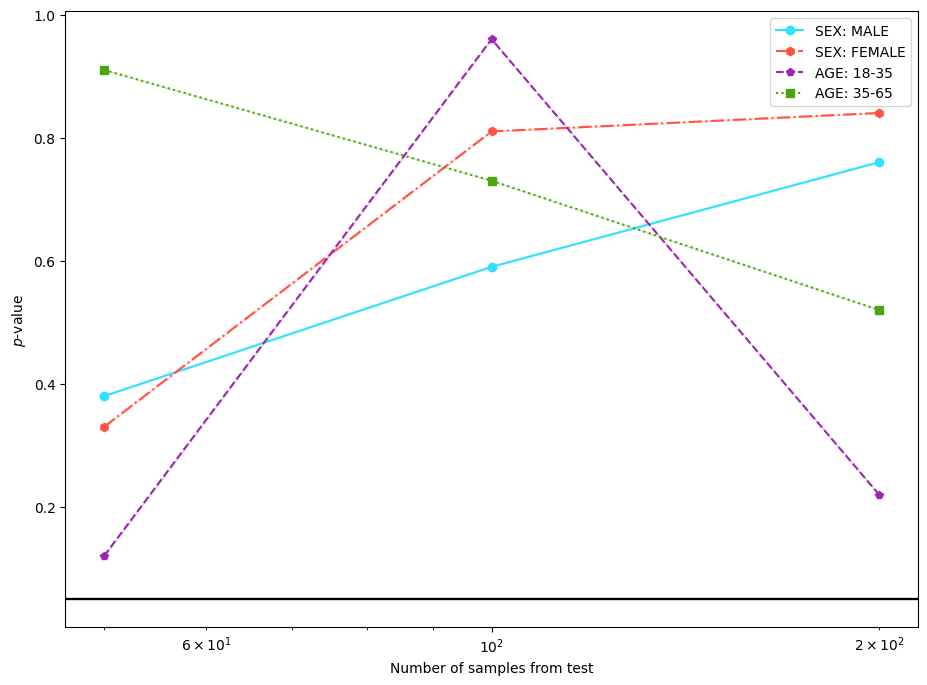

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.32 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.79 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.74 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.73 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.40 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.29 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.75 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.85 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.17 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.08 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.88 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.35 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.03 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.00 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.20 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.61 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.93 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.15 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.80 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.23 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.70 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.68 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.28 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.10 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.92 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.84 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.97 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.39 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.55 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.75 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 27.02 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.32 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.52 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.88 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 27.08 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.60 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.88 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.43 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.53 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.56 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.35 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.74 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.94 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.18 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.13 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.64 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.75 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.65 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.79 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.84 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 27.10 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.85 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 27.03 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.83 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.23 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.98 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.33 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.84 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 27.02 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.86 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.93 examples/s]

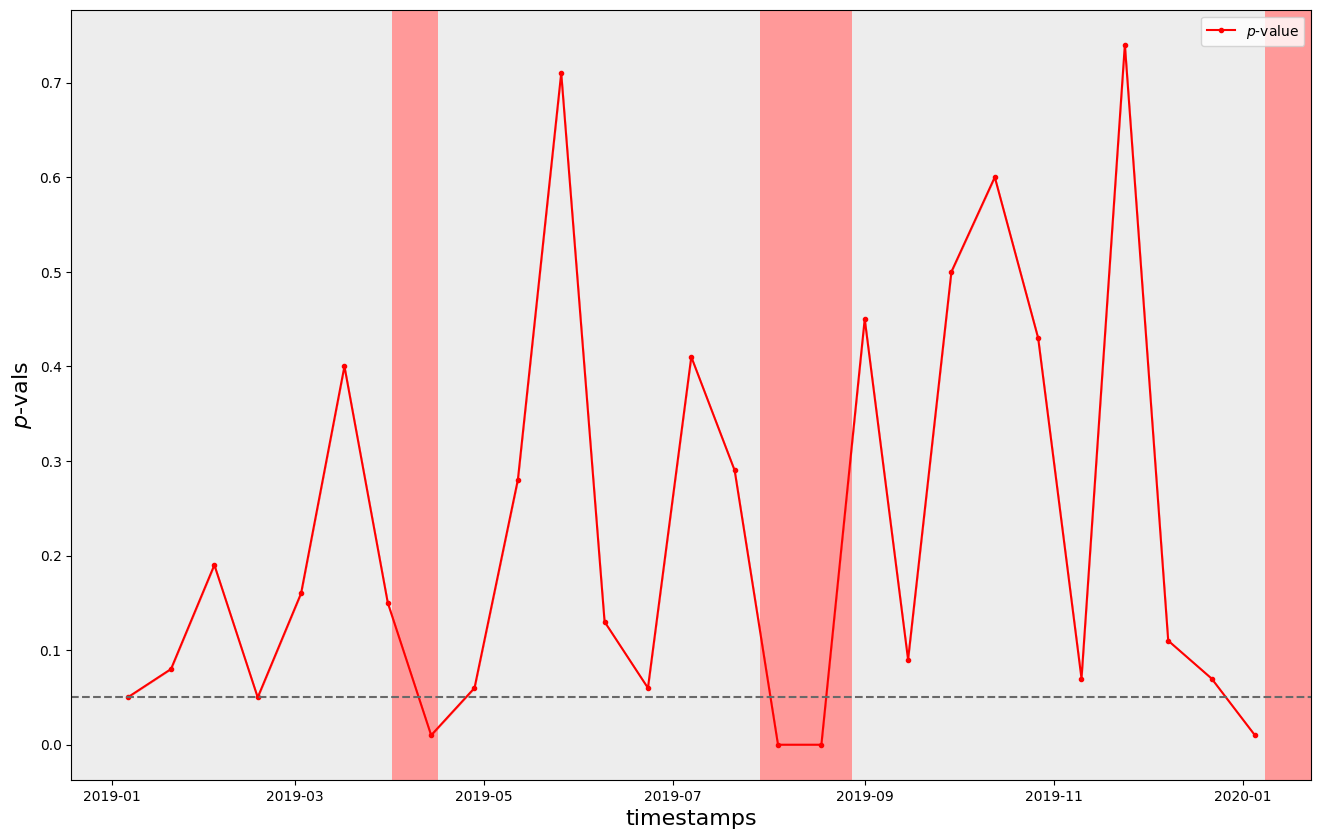

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)